### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
tf.__version__
import numpy as np

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [0]:
x = keras.datasets.fashion_mnist.load_data()

In [6]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
np.unique(testY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

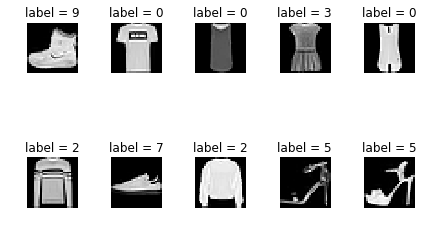

In [10]:
import matplotlib.pyplot as plt
 
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    #image = trainX[i][0].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    image = trainX[i]
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    x= 0
    y =0
    for x,y in enumerate(trainY[i]):
      if y > 0:
        plt.title('label = {}'.format(x))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
#plt.savefig('images/mnist_plot.png')
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [12]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 14.5070 - acc: 0.1000 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 7/10
60000/60000 [==============================] 

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [14]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5969 - acc: 0.7929 - val_loss: 0.5220 - val_acc: 0.8207
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4898 - acc: 0.8305 - val_loss: 0.4879 - val_acc: 0.8277
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4673 - acc: 0.8389 - val_loss: 0.4845 - val_acc: 0.8333
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4594 - acc: 0.8400 - val_loss: 0.4728 - val_acc: 0.8380
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4495 - acc: 0.8450 - val_loss: 0.4771 - val_acc: 0.8369
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4434 - acc: 0.8465 - val_loss: 0.4740 - val_acc: 0.8383
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4390 - acc: 0.8478 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
from keras.optimizers import SGD
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#Comile the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9520 - acc: 0.6802 - val_loss: 0.6855 - val_acc: 0.7719
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6429 - acc: 0.7800 - val_loss: 0.6031 - val_acc: 0.7965
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5882 - acc: 0.7978 - val_loss: 0.5739 - val_acc: 0.8064
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5609 - acc: 0.8078 - val_loss: 0.5526 - val_acc: 0.8140
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5418 - acc: 0.8146 - val_loss: 0.5372 - val_acc: 0.8165
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5302 - acc: 0.8170 - val_loss: 0.5302 - val_acc: 0.8171
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5164 - acc: 0.8221 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add outputlayer 
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [29]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/sample - loss: 1.0441 - acc: 0.6926 - val_loss: 0.6381 - val_acc: 0.7675
Epoch 2/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.5762 - acc: 0.7965 - val_loss: 0.5172 - val_acc: 0.8143
Epoch 3/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4980 - acc: 0.8237 - val_loss: 0.4702 - val_acc: 0.8310
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4561 - acc: 0.8384 - val_loss: 0.4470 - val_acc: 0.8387
Epoch 5/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4310 - acc: 0.8459 - val_loss: 0.4280 - val_acc: 0.8437
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.4129 - acc: 0.8536 - val_loss: 0.4159 - val_acc: 0.8506
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3969 - acc: 0.8593 - val_l